# Import Statements

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

import matplotlib.pyplot as plt

# Gether data

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
Label_name = [
    "T-shirt/top", "Trouser", "Pullover",   "Dress",     "Coat",      "Sandal",    "Shirt",     "Sneaker",   "Bag",       "Ankle boot"
]

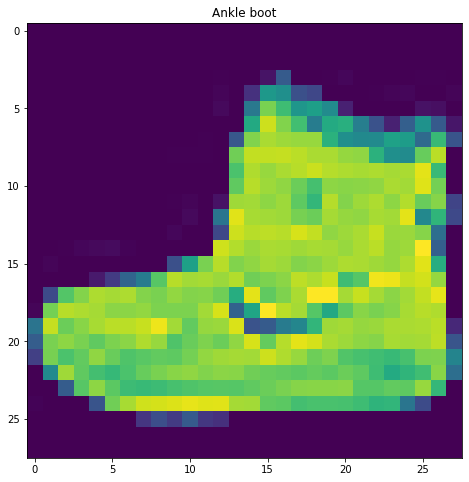

In [6]:
# visualizaton of data

plt.figure(figsize=(8, 8))

plt.imshow(x_train[0])
plt.title(Label_name[y_train[0]])
plt.show()

In [7]:
# Normalizing the data

x_train, x_test = x_train /255.0, x_test/255.0

In [8]:
x_train.max(), x_test.max()

(1.0, 1.0)

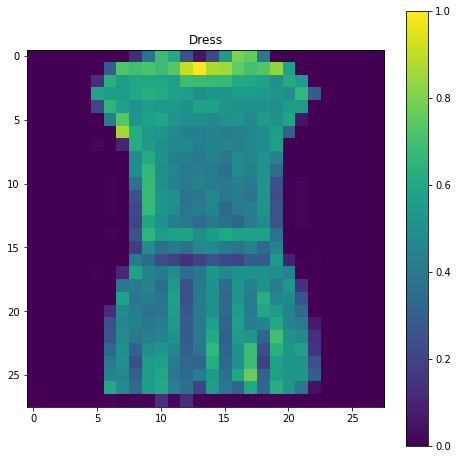

In [9]:
# visualizaton of data

plt.figure(figsize=(8, 8))

plt.imshow(x_train[3])
plt.title(Label_name[y_train[3]])
plt.colorbar()
plt.show()

In [10]:
# Flatteing the dataset

x_train, x_test = x_train.reshape(-1, 28*28), x_test.reshape(-1, 28*28)

In [11]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Building the model

In [12]:
model = keras.models.Sequential()

In [13]:
# adding layers

model.add(keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

# 2nd layers
model.add(keras.layers.Dense(units=64, activation='relu'))

# 3rd dropout layers
model.add(keras.layers.Dropout(0.5))

# 4th output layers
model.add(keras.layers.Dense(units=10, activation='sigmoid'))



In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [15]:
# complte the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Training and Evaluation the model

In [16]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6364 - sparse_categorical_accuracy: 0.7771
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4483 - sparse_categorical_accuracy: 0.8420
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4026 - sparse_categorical_accuracy: 0.8598
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3755 - sparse_categorical_accuracy: 0.8679
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3526 - sparse_categorical_accuracy: 0.8751
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3373 - sparse_categorical_accuracy: 0.8784
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3228 - sparse_categorical_accuracy: 0.8848
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3131 - sparse_categorical_accuracy: 0.8862
Epoch 9/10
1875/1875 [========

In [17]:
# Evaluation of model

model.evaluate(x_train, y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2539 - sparse_categorical_accuracy: 0.9016


[0.2538720965385437, 0.9015666842460632]

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
y_pred = model.predict(x_test)

In [21]:
pred = np.argmax(y_pred, axis=-1)

In [23]:
print(accuracy_score(y_test, pred))

0.8746


In [24]:
print(confusion_matrix(y_test, pred))

[[773   2  25  50   5   0 136   0   9   0]
 [  2 961   0  30   3   0   2   0   2   0]
 [  9   0 737  15 161   0  78   0   0   0]
 [  9   3  10 911  31   0  32   0   4   0]
 [  0   0  55  40 851   0  53   0   1   0]
 [  0   0   0   0   0 934   0  50   0  16]
 [ 82   0  77  43  97   0 689   0  12   0]
 [  0   0   0   0   0   3   0 952   0  45]
 [  2   0   3   6   4   3   4   6 972   0]
 [  0   0   0   0   0   8   1  25   0 966]]


In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.74      0.77      1000
           3       0.83      0.91      0.87      1000
           4       0.74      0.85      0.79      1000
           5       0.99      0.93      0.96      1000
           6       0.69      0.69      0.69      1000
           7       0.92      0.95      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [29]:
# Saving the trainined model
model.save('./model')